In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pygeohash as gh

In [2]:
import sys
import os
sys.path.append(os.path.dirname(sys.path[0]))
from python.data_cleaning import prepare_data_for_groupby
from python.grouped_data import data_for_analysis
from typing import Dict, List, Tuple, Sequence

In [3]:
csv_path = '/home/linnanchen/code/MagicaBleps/UK-road-safety/raw_data'
df = pd.read_csv(os.path.join(csv_path,'df_accident_1999_2019.csv'))
df.head()

/tmp/ipykernel_10189/116672672.py:2: DtypeWarning: Columns (1,3,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(csv_path,'df_accident_1999_2019.csv'))


,Unnamed: 0,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,4883216,1999010SU0945,1999,010SU0945,519490.0,203300.0,-0.271752,51.715661,1,3,...,0,1,4,1,0,0,2,1,1,E01023583
1,4883217,1999010SU0946,1999,010SU0946,521740.0,201070.0,-0.239977,51.695136,1,3,...,0,6,4,1,0,0,2,1,1,E01023584
2,4883218,1999010SU0947,1999,010SU0947,519610.0,203240.0,-0.270037,51.715096,1,3,...,0,4,1,2,0,0,2,1,1,E01023583
3,4883219,1999010SU0948,1999,010SU0948,520090.0,202830.0,-0.263233,51.711309,1,2,...,0,6,1,1,0,0,2,1,1,E01023583
4,4883220,1999010SU0949,1999,010SU0949,522640.0,200320.0,-0.227225,51.688200,1,3,...,0,1,1,2,0,0,2,1,1,E01023584


In [4]:
df_new = prepare_data_for_groupby(df,5)

max_geohash = df_new['geohash'].value_counts().index[0]

In [5]:
df_max_geo = df_new[df_new['geohash'] == max_geohash]
df_max_geo

,Unnamed: 0,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,IsWeekend,month,Daytime,geohash
1477,4884693,1999,-0.129387,51.513396,3,1,1,1999-01-02,7,03:40,False,1,night (23-5,gcpvj
1483,4884699,1999,-0.131536,51.510193,3,1,1,1999-01-04,2,03:29,False,1,night (23-5,gcpvj
1523,4884739,1999,-0.131754,51.508398,3,2,1,1999-02-14,1,20:45,True,2,evening (19-23),gcpvj
1525,4884741,1999,-0.131211,51.507580,3,2,1,1999-02-20,7,17:10,False,2,afternoon rush (15-19),gcpvj
1529,4884745,1999,-0.131754,51.508398,3,2,2,1999-02-16,3,22:40,False,2,evening (19-23),gcpvj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608606,8491822,2019,-0.093776,51.516394,2,2,1,2019-09-17,3,17:47,False,9,afternoon rush (15-19),gcpvj
3608607,8491823,2019,-0.088141,51.512930,3,1,1,2019-10-03,5,09:15,False,10,morning rush (5-10),gcpvj
3608612,8491828,2019,-0.107082,51.511124,3,2,1,2019-12-06,6,18:30,False,12,afternoon rush (15-19),gcpvj
3608613,8491829,2019,-0.095531,51.512682,3,2,1,2019-12-12,5,15:23,False,12,afternoon rush (15-19),gcpvj


In [6]:
df_max_geo = data_for_analysis(df_max_geo,granularity='W')
df_max_geo

,Accidents
date,
1999-01-04,12
1999-01-11,31
1999-01-18,30
1999-01-25,39
1999-02-01,50
...,...
2019-12-09,23
2019-12-16,10
2019-12-23,25


In [7]:
TARGET = 'Accidents'

In [8]:
# --------------------------------------------------- #
# Let's consider FOLDS with a length of 4 years       #
# (3 years will be used for train, 1 for test!)       #
# --------------------------------------------------- #

FOLD_LENGTH = 4*52 # 4 years x 52 weeks/year = 208 weeks
                        # 4 years

# --------------------------------------------------- #
# Let's consider FOLDS starting every trimester       #
# --------------------------------------------------- #
    
FOLD_STRIDE = 2*52 # every 2 years x 52 = 104 weeks
                   # 2 years

# --------------------------------------------------- #
# Let's consider a train-test-split ratio of 3/4      #
# --------------------------------------------------- #

TRAIN_TEST_RATIO = 0.75

In [9]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int) -> List[pd.DataFrame]:
    '''
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold
    
    Returns a list of folds, each as a DataFrame
    '''
    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds

In [10]:
folds = get_folds(df_max_geo, FOLD_LENGTH, FOLD_STRIDE)
len(folds)

9

In [11]:
fold = folds[0]
fold

,Accidents
date,
1999-01-04,12
1999-01-11,31
1999-01-18,30
1999-01-25,39
1999-02-01,50
...,...
2002-11-25,29
2002-12-02,28
2002-12-09,40


In [12]:
INPUT_LENGTH =  20 #20 weeks

In [13]:
def train_test_split(fold:pd.DataFrame,
                     train_test_ratio: float,
                     input_length: int) -> Tuple[pd.DataFrame]:
    '''
    Returns a train dataframe and a test dataframe (fold_train, fold_test)
    from which one can sample (X,y) sequences.
    df_train should contain all the timesteps until round(train_test_ratio * len(fold))   
    '''
    # TRAIN SET
    # ======================
    last_train_idx = round(train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_idx, :]
    
    # TEST SET
    # ======================   
    first_test_idx = last_train_idx - input_length
    fold_test = fold.iloc[first_test_idx:, :]
    
    return (fold_train, fold_test)
    

In [14]:
(fold_train, fold_test) = train_test_split(fold, TRAIN_TEST_RATIO, INPUT_LENGTH)

In [15]:
OUTPUT_LENGTH = 1

In [16]:
def get_Xi_yi(
    fold:pd.DataFrame, 
    input_length:int, 
    output_length:int):
    '''
    - given a fold, it returns one sequence (X_i, y_i)
    - with the starting point of the sequence being chosen at random
    '''
    first_possible_start = 0
    last_possible_start = len(fold) - (input_length + output_length) + 1
    random_start = np.random.randint(first_possible_start, last_possible_start)
    X_i = fold.iloc[random_start:random_start+input_length]  
    y_i = fold.iloc[random_start+input_length:
                  random_start+input_length+output_length][[TARGET]]
    
    return (X_i, y_i)

In [17]:
def get_X_y(
    fold:pd.DataFrame,
    number_of_sequences:int,
    input_length:int,
    output_length:int
):
    X, y = [], []

    for i in range(number_of_sequences):
        (Xi, yi) = get_Xi_yi(fold, input_length, output_length)
        X.append(Xi)
        y.append(yi)
        
    return np.array(X), np.array(y)


In [18]:
N_TRAIN = 7500 # number_of_sequences_train
N_TEST =  2500 # number_of_sequences_test

X_train, y_train = get_X_y(fold_train, N_TRAIN, INPUT_LENGTH, OUTPUT_LENGTH)
X_test, y_test = get_X_y(fold_test, N_TEST, INPUT_LENGTH, OUTPUT_LENGTH)

In [19]:
print("FOLD_LENGTH") 
print(f"= {FOLD_LENGTH} timesteps")
print(f"= {int(FOLD_LENGTH)} weeks") 
print(f"= {int(FOLD_LENGTH/52)} years")

FOLD_LENGTH
= 208 timesteps
= 208 weeks
= 4 years


In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7500, 20, 1)
(7500, 1, 1)
(2500, 20, 1)
(2500, 1, 1)


## Prediction baseline model

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization

2022-12-08 11:17:12.396075: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 11:17:12.646690: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-08 11:17:12.703262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 11:17:12.703278: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
def init_model(X_train):
    #norm = Normalization()
    #norm.adapt(X_train)
    
    model = Sequential()
    #model.add(norm.adapt(X_train))
    model.add(SimpleRNN(20, activation='tanh' ,recurrent_dropout = 0.3,input_shape=X_train[0].shape))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="linear"))

    adam = optimizers.Adam(learning_rate=0.02)  
    model.compile(loss='mse', optimizer=adam, metrics=['mae'])
    
    return model

In [24]:
model = init_model(X_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


2022-12-08 11:17:15.367100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-08 11:17:15.367377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 11:17:15.367680: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-08 11:17:15.367941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-08 11:17:15.368015: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [31]:
model.save('../model/testing')

INFO:tensorflow:Assets written to: ../model/testing/assets


In [30]:
!pwd

/home/linnanchen/code/MagicaBleps/UK-road-safety/notebooks


In [25]:
es = EarlyStopping(monitor = "val_loss",
                      patience = 50,
                      mode = "min",
                      restore_best_weights = True)

In [26]:
history = model.fit(X_train, y_train,
                        validation_split = 0.3,
                        shuffle = False,
                        batch_size = 32,
                        epochs = 20,
                        callbacks = [es],
                        verbose = 1)

Epoch 1/500
165/165 [==============================] - 2s 6ms/step - loss: 169.8787 - mae: 9.5775 - val_loss: 68.3214 - val_mae: 6.8718
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 64.3204 - mae: 6.5892 - val_loss: 68.1307 - val_mae: 6.8300
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 64.4824 - mae: 6.5947 - val_loss: 68.2828 - val_mae: 6.8045
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 64.6384 - mae: 6.6021 - val_loss: 68.4191 - val_mae: 6.7940
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 64.7280 - mae: 6.6068 - val_loss: 68.4449 - val_mae: 6.7945
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 64.8097 - mae: 6.6094 - val_loss: 68.3944 - val_mae: 6.7947
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 64.8436 - mae: 6.6105 - val_loss: 68.3184 - val_mae: 6.8003
Epoch 8/500
165/165 [==============================] -

In [27]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax

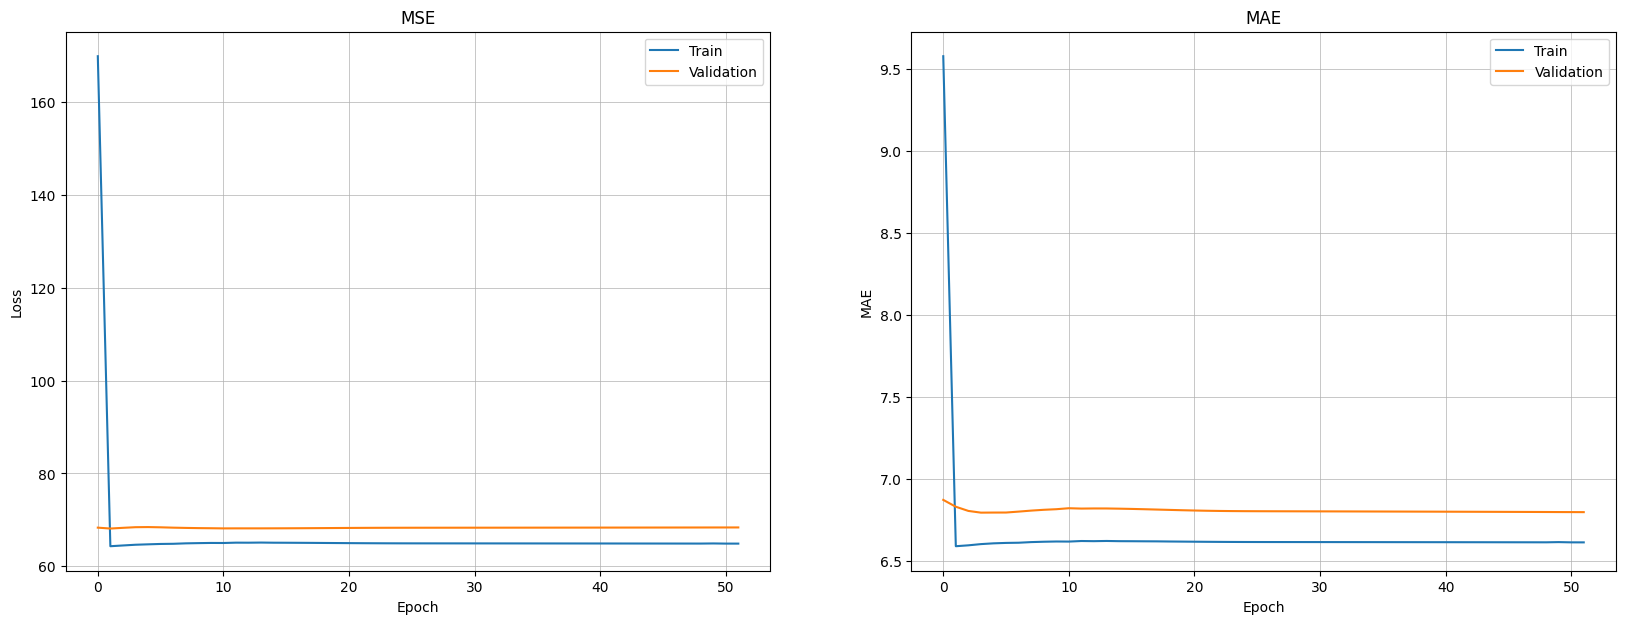

In [28]:
plot_history(history);

In [29]:
res=model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 2ms/step - loss: 70.2606 - mae: 6.9080
